# Titanic survivors analysis
Below is a brief analysis of the titanic survivor data on https://www.kaggle.com/c/titanic/data

In [615]:
import numpy as np 
import scipy as sp 
import matplotlib as mpl
import matplotlib.cm as cm 
import matplotlib.pyplot as plt
import pandas as pd 
#from pandas.tools.plotting import scatter_matrix
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
import seaborn as sns
sns.set(style="whitegrid")
import warnings
warnings.filterwarnings('ignore')
import string
import math
import sys
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
import sklearn
from IPython.core.interactiveshell import InteractiveShell
from IPython.display import display, HTML

InteractiveShell.ast_node_interactivity = "all"

To analysis the data, the first step is to peek into overal information of the data:

1. Show the first few rows of the data, get a sense of what the data is about

2. What is the data type of each column


In [616]:
train = pd.read_csv('titanic_train.csv')
train.head()
train.tail()

print('_'*40)

print('General information:\n')
train.info()

print('_'*40)
print('Number of nulls in each column:\n', train.isnull().sum())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


________________________________________
General information:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
________________________________________
Number of nulls in each column:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


 Basic statistic of each column


In [617]:
train.describe(include='all')  # use "include='all' " to take into account the nonnumerical data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Penasco y Castellana, Mrs. Victor de Satode (M...",male,NaN,NaN,NaN,CA. 2343,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


Survivor number and percentage

0    549
1    342
Name: Survived, dtype: int64

0    0.616162
1    0.383838
Name: Survived, dtype: float64

Int64Index([0, 1], dtype='int64')

<Figure size 432x288 with 0 Axes>

<BarContainer object of 1 artists>

<BarContainer object of 1 artists>

([<matplotlib.axis.XTick at 0x26b6a208>,
 <a list of 2 Text xticklabel objects>)

Text(0, 0.5, 'Number of people')

Text(0.5, 1.0, 'Counts of Survival')

Text(0, 274.5, '549 (62%)')

Text(1, 171.0, '342 (38%)')

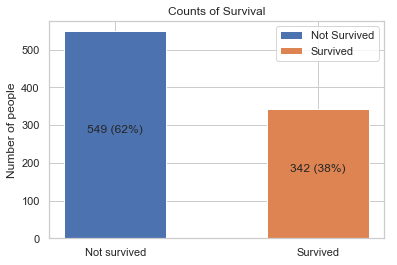

In [618]:
survive = train['Survived'].value_counts()
survive 

survive_percentage = survive/survive.sum()
survive_percentage

x = train['Survived'].value_counts().index 
x

width = 0.5
plt.figure()
plt.bar (x[0], survive[0], width, label = 'Not survived' )
plt.bar (x[1], survive[1], width, label = 'Survived' )
plt.xticks(x,('Not survived','Survived'))
plt.legend(['Not Survived', 'Survived'])
plt.ylabel('Number of people')

plt.title('Counts of Survival')

for nx in x:
    plt.annotate('{} ({:.0%})'.format(survive[nx],survive_percentage[nx]),xy = (x[nx],survive[nx]/2),ha='center', va='bottom')

plt.show()



Gender and Pclass

In [622]:

column = 'Sex'

def cat_distr (column):
    
    data = train[column].value_counts()
    x = train[column].value_counts().index
    perc = data/data.sum()
    return [data,x,perc]

[data,x,perc] = cat_distr(column)

#data=float(data)
#(train[column]=='male')*1-0.5
#data
#x[0]
xnum = np.arange(len(x))
#xnum[0]
#perc


<Figure size 432x288 with 0 Axes>

<BarContainer object of 1 artists>

Text(0, 288.5, '577 (65%)')

<BarContainer object of 1 artists>

Text(1, 157.0, '314 (35%)')

([<matplotlib.axis.XTick at 0x27bdb7b8>,
 <a list of 2 Text xticklabel objects>)

Text(0, 0.5, 'Number of people')

Text(0.5, 1.0, 'Distribution of Sex')

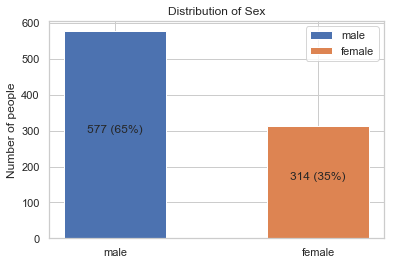

In [623]:
# draw a bar graph

width = 0.5
plt.figure()

for nx in xnum: 
    #xnum[nx]
    #x[nx]
    plt.bar (xnum[nx], data[nx], width, label = column +':'+ str(x[nx]) )
    
    plt.annotate('{} ({:.0%})'.format(data[nx],perc[nx]),xy = (xnum[nx],data[nx]/2),ha='center', va='bottom')

plt.legend(x)
plt.xticks(xnum,x)
plt.ylabel('Number of people')
plt.title('Distribution of '+ column)

plt.show()

In [624]:
column = 'Pclass'
[data,x,perc] = cat_distr(column)

data # pay attention, data and perc are pd.series, need to use .iloc to access element by the position
perc

data.iloc[0]
perc.iloc[0]

x  # but x and xnum are numpy array, and use [location] is sufficient
xnum = np.arange(len(x))

x[0]
xnum[0]


3    491
1    216
2    184
Name: Pclass, dtype: int64

3    0.551066
1    0.242424
2    0.206510
Name: Pclass, dtype: float64

491

0.5510662177328844

Int64Index([3, 1, 2], dtype='int64')

3

0

<Figure size 432x288 with 0 Axes>

<BarContainer object of 1 artists>

Text(0, 245.5, '491 (55%)')

<BarContainer object of 1 artists>

Text(1, 108.0, '216 (24%)')

<BarContainer object of 1 artists>

Text(2, 92.0, '184 (21%)')

([<matplotlib.axis.XTick at 0x27c249b0>,
 <a list of 3 Text xticklabel objects>)

Text(0, 0.5, 'Number of people')

Text(0.5, 1.0, 'Distribution of Pclass')

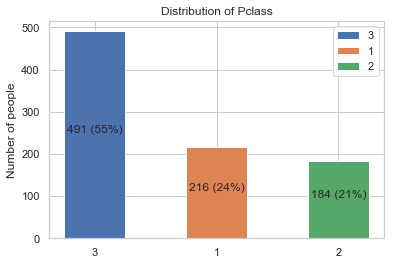

In [625]:
width = 0.5
plt.figure()

#data[1]

for nx in xnum: 
    #str(x[nx])  
    #xnum[nx]    
    #data.iloc[nx]    
    plt.bar (xnum[nx], data.iloc[nx], width, label = column +':'+str(x[nx]) )
    plt.annotate('{} ({:.0%})'.format(data.iloc[nx],perc.iloc[nx]),xy = (xnum[nx],data.iloc[nx]/2),ha='center', va='bottom')

    
plt.legend(x)
plt.xticks(xnum,x)
plt.ylabel('Number of people')
plt.title('Distribution of '+ column)

plt.show()

# Age group & Fair group

(array([40., 14., 15., 31., 79., 98., 85., 84., 73., 45., 35., 35., 29.,
        16., 13., 11.,  4.,  5.,  1.,  1.]),
 array([ 0.42 ,  4.399,  8.378, 12.357, 16.336, 20.315, 24.294, 28.273,
        32.252, 36.231, 40.21 , 44.189, 48.168, 52.147, 56.126, 60.105,
        64.084, 68.063, 72.042, 76.021, 80.   ]),
 <a list of 20 Patch objects>)

Text(0.5, 0, 'Age')

Text(0, 0.5, 'Number of People')

Text(0.5, 1.0, 'Age Distribution')

(0, 110)

(array([562., 170.,  67.,  39.,  15.,  16.,   2.,   0.,   9.,   2.,   6.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   3.]),
 array([  0.     ,  25.61646,  51.23292,  76.84938, 102.46584, 128.0823 ,
        153.69876, 179.31522, 204.93168, 230.54814, 256.1646 , 281.78106,
        307.39752, 333.01398, 358.63044, 384.2469 , 409.86336, 435.47982,
        461.09628, 486.71274, 512.3292 ]),
 <a list of 20 Patch objects>)

Text(0.5, 0, 'Fare')

Text(0, 0.5, 'Number of People')

Text(0.5, 1.0, 'Fare Distribution')

(0, 600)

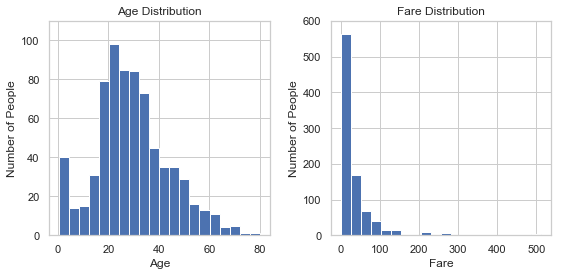

In [626]:
known_age = train['Age'].notnull()
age=train['Age']
known_age_group = age[known_age]
#known_age_group

fare = train['Fare']
#fare

# draw a histograme for the age distribution
n_bins = 20
fig,plots = plt.subplots (1,2,sharey = False, tight_layout = True,figsize=(8, 4)) # don't miss fig,
plots[0].hist(known_age_group,bins = n_bins)
plots[0].set_xlabel('Age')
plots[0].set_ylabel('Number of People')
plots[0].set_title('Age Distribution')
plots[0].set_ylim(0, 110)

plots[1].hist(fare,bins = n_bins)
plots[1].set_xlabel('Fare')
plots[1].set_ylabel('Number of People')
plots[1].set_title('Fare Distribution')
plots[1].set_ylim(0, 600)



# Correlation matrix between different columns

In [627]:
train['sex_num']=(train[column]=='male')*1-0.5 # convert gender to numeric, "male"=0.5, "female" = -0.5

corr_matrix = train[['Survived', 'Pclass','sex_num','Age','SibSp','Parch','Fare']].corr()
corr_matrix

fig,plots = plt.subplots(figsize=(6, 6))
sns.heatmap(corr_matrix, vmin=-0.7, vmax=0.7 ,annot=True, linewidths=0.5, fmt='.2f',cmap="PiYG")
plots.set_ylim(7, 0)
plt.show()


TypeError: invalid type comparison

# Relation between survival and other parameters


### Survival vs Gender

In [628]:

sv_sex = train.groupby(['Survived'])['Sex']
sv_sex_num = sv_sex.value_counts()
xnum = train['Survived'].value_counts().index

sv_sex_num

xnum

# percentage of male and female survived/not survived
sv_male_perc = [sv_sex_num[0,'male'],sv_sex_num[1,'male']]/(sv_sex_num[0,'male']+sv_sex_num[1,'male'])
sv_female_perc = [sv_sex_num[0,'female'],sv_sex_num[1,'female']]/(sv_sex_num[0,'female']+sv_sex_num[1,'female'])
sv_male_perc
sv_female_perc


Survived  Sex   
0         male      468
          female     81
1         female    233
          male      109
Name: Sex, dtype: int64

Int64Index([0, 1], dtype='int64')

array([0.81109185, 0.18890815])

array([0.25796178, 0.74203822])

<BarContainer object of 1 artists>

Text(0, 234.0, '468\n81% of males')

<BarContainer object of 1 artists>

Text(0, 508.5, '81\n26% of females')

<BarContainer object of 1 artists>

Text(1, 54.5, '109\n19% of males')

<BarContainer object of 1 artists>

Text(1, 225.5, '233\n74% of females')

([<matplotlib.axis.XTick at 0x27dbe390>,
 <a list of 2 Text xticklabel objects>)

Text(0, 0.5, 'Number of people')

Text(0.5, 1.0, 'Distribution of Pclass')

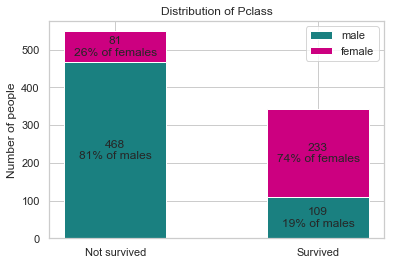

In [629]:
# draw a bar chart

width=0.5

sv_male = sv_sex_num [1,'male']
nsv_male = sv_sex_num [0,'male']
sv_female = sv_sex_num [1,'female']
nsv_female = sv_sex_num [0,'female']

for nx in xnum:
    
    
    plt.bar (xnum[nx], sv_sex_num [nx,'male'], width,color = [0.1,0.5,0.5])    
    plt.annotate('{}\n{:.0%} of males'.format(sv_sex_num [nx,'male'],sv_male_perc[nx]),xy = (xnum[nx],sv_sex_num [nx,'male']/2),ha='center', va='center')

    plt.bar (xnum[nx], sv_sex_num [nx,'female'], width, bottom=sv_sex_num [nx,'male'],color = [0.8,0,0.5])    
    plt.annotate('{}\n{:.0%} of females'.format(sv_sex_num [nx,'female'],sv_female_perc[nx]),xy = (xnum[nx],sv_sex_num [nx,'male']+sv_sex_num [nx,'female']/2),ha='center', va='center')

    
plt.legend(['male','female'])
plt.xticks(xnum,['Not survived', 'Survived'])
plt.ylabel('Number of people')
plt.title('Distribution of '+ column)

plt.show()

We can also define a function to calculate the survival rate of each group

In [630]:
def sv_rate (data):
    per = data.sum()/data.count()
    return per

sv_sex = train.groupby('Sex')['Survived']
sv_rate_sex = sv_sex.apply(sv_rate)
x_sex = np.arange(sv_rate_sex.count())

sv_sex_rate

sv_Pclass = train.groupby('Pclass')['Survived']
sv_rate_Pclass = sv_Pclass.apply(sv_rate)
x_Pclass = np.arange(sv_rate_Pclass.count())

x_Pclass
sv_rate_Pclass.iloc[0]



Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

array([0, 1, 2])

0.6296296296296297

Draw bar chart

<Figure size 432x288 with 0 Axes>

(<Figure size 576x288 with 2 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000000027DF3278>,
       dtype=object))

<BarContainer object of 1 artists>

Text(0, 0.37101910828025475, '74%')

<BarContainer object of 1 artists>

Text(1, 0.09445407279029462, '19%')

([<matplotlib.axis.XTick at 0x27e677b8>,
 <a list of 2 Text xticklabel objects>)

Text(0.5, 0, 'Passenger Gender')

Text(0, 0.5, 'Survival Rate')

Text(0.5, 1.0, 'Survival Rate vs Gender')

<BarContainer object of 1 artists>

Text(0, 0.3148148148148148, '63%')

<BarContainer object of 1 artists>

Text(1, 0.23641304347826086, '47%')

<BarContainer object of 1 artists>

Text(2, 0.12118126272912423, '24%')

([<matplotlib.axis.XTick at 0x27ea1160>,
 <a list of 3 Text xticklabel objects>)

Text(0.5, 0, 'Passenger Class')

Text(0, 0.5, 'Survival Rate')

Text(0.5, 1.0, 'Survival Rate vs Passenger Class')

<Figure size 432x288 with 0 Axes>

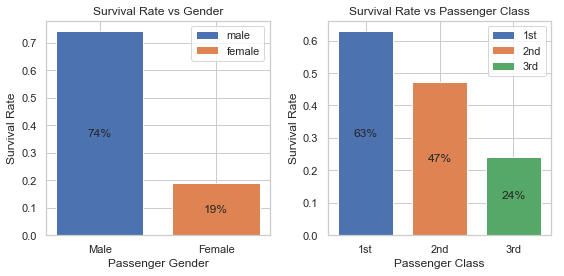

In [631]:


plt.figure()
plt.subplots (1,2,sharey = False, tight_layout = True,figsize=(8, 4)) # don't miss fig,

width = 0.75

plt.subplot(121)

for nx in x_sex:    
    plt.bar (x_sex[nx], sv_rate_sex[nx], width)   
    plt.annotate('{:.0%}'.format(sv_rate_sex [nx]),xy = (x_sex[nx],sv_rate_sex[nx]/2),ha='center', va='center')

plt.legend(['male','female'])
plt.xticks(x_sex,['Male', 'Female'])
plt.xlabel('Passenger Gender')
plt.ylabel('Survival Rate')
plt.title('Survival Rate vs Gender')


plt.subplot(122)

for nx in x_Pclass:
    #x_Pclass[nx]
    #sv_Pclass_rate.iloc[nx]
    
    plt.bar(x_Pclass[nx], sv_rate_Pclass.iloc[nx], width)   
    plt.annotate('{:.0%}'.format(sv_rate_Pclass.iloc[nx]),xy = (x_Pclass[nx],sv_rate_Pclass.iloc[nx]/2),ha='center', va='center')
    
plt.legend(['1st','2nd','3rd'])
plt.xticks(x_Pclass,['1st','2nd','3rd'])
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')
plt.title('Survival Rate vs Passenger Class')


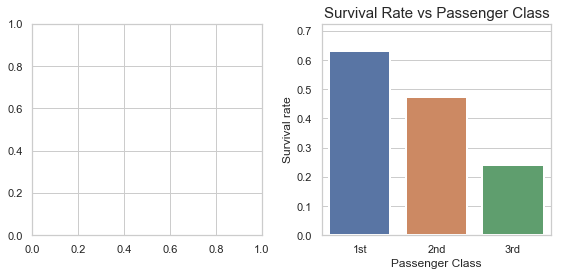

In [632]:
# Another way to plot is to use seaborn

figure,

plt.subplots(1,2,sharey = False, tight_layout = True,figsize=(8, 4))

plt.subplot(122)
sns.barplot(x = "Pclass", 
            y = "Survived", 
            estimator = np.mean,   # another trick to calculate the survival rate, is to use mean() function, since survived = 1, nonsurvived = 0
            data=train, 
            #ax = pclass_bar,
            capsize = 0,
            errwidth = 0,
            linewidth = 2 )
plt.title("Survival Rate vs Passenger Class",fontsize = 15)
plt.xlabel("Passenger Class", fontsize = 12);
plt.ylabel("Survival rate", fontsize = 12);
labels = ['1st', '2nd', '3rd']
#val = sorted(train.Pclass.unique())
val = [0,1,2] ## this is just a temporary trick to get the label right. 
plt.xticks(val,labels);

### Survivale rate vs Sex and Pclass

<Figure size 432x288 with 0 Axes>

<BarContainer object of 1 artists>

Text(-0.15, 0.48404255319148937, '97%')

<BarContainer object of 1 artists>

Text(0.15, 0.18442622950819673, '37%')

<BarContainer object of 1 artists>

Text(0.85, 0.4605263157894737, '92%')

<BarContainer object of 1 artists>

Text(1.15, 0.0787037037037037, '16%')

<BarContainer object of 1 artists>

Text(1.85, 0.25, '50%')

<BarContainer object of 1 artists>

Text(2.15, 0.06772334293948126, '14%')

([<matplotlib.axis.XTick at 0x27e4a438>,
 <a list of 3 Text xticklabel objects>)

Text(0.5, 0, 'Passenger Class')

Text(0, 0.5, 'Survival Rate')

Text(0.5, 1.0, 'Survival Rate vs Gender & Passenger Class ')

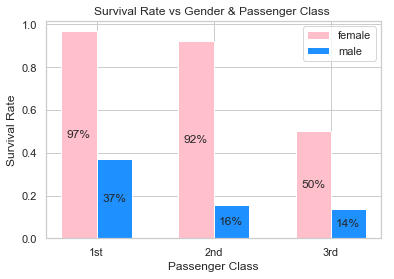

In [633]:
sv_sex_class = train.groupby(['Sex','Pclass'])['Survived']
#sv_sex_class.sum()


sv_rate_sex_class = sv_sex_class.apply(sv_rate)
#sv_rate_sex_class
#sv_rate_sex_class['female',1]

#sv_class_sex = train.groupby(['Pclass','Sex'])['Survived']
#sv_rate_class_sex = sv_class_sex.apply(sv_rate)
#sv_rate_class_sex

plt.figure()

width = 0.3

for nx in x_Pclass:
    #x_Pclass[nx]
    sv_fm = sv_rate_sex_class['female',nx+1]    
    plt.bar(x_Pclass[nx]-width/2, sv_fm, width, color = 'pink')   
    plt.annotate('{:.0%}'.format(sv_fm),xy = (x_Pclass[nx]-width/2,sv_fm/2),ha='center', va='center')
    
    sv_m = sv_rate_sex_class['male',nx+1]    
    plt.bar(x_Pclass[nx]+width/2, sv_m, width, color = 'dodgerblue')   
    plt.annotate('{:.0%}'.format(sv_m),xy = (x_Pclass[nx]+width/2,sv_m/2),ha='center', va='center')
    
plt.legend(['female','male'])
plt.xticks(x_Pclass,['1st','2nd','3rd'])
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')
plt.title('Survival Rate vs Gender & Passenger Class ')   

### Survival rate vs age distribution

<Figure size 432x288 with 0 Axes>

(<Figure size 576x288 with 2 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000000027FDCEB8>,
       dtype=object))

Text(0.5, 0, 'Age')

Text(0, 0.5, 'Distribution')

Text(0.5, 1.0, 'Distribution of Survived Passengers')

Text(0.5, 0, 'Age')

Text(0, 0.5, 'Distribution')

Text(0.5, 1.0, 'Distribution of Non-survived Passengers')

<Figure size 432x288 with 0 Axes>

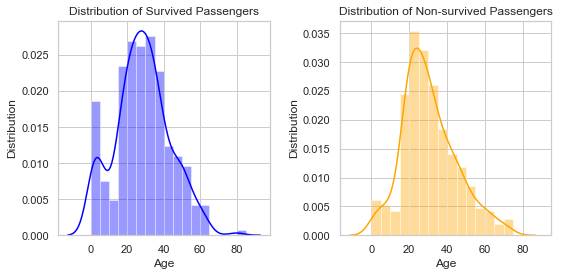

In [634]:
sv_age = train['Age'][(train['Survived']==1)& train['Age'].notnull()]
nsv_age = train['Age'][(train['Survived']==0)& train['Age'].notnull()]


n_bins = 18
plt.figure()
plt.subplots(1,2,sharey = False, tight_layout = True,figsize=(8, 4))

#ax1 = plt.subplot(1,2,1)
#plt.hist(sv_age,bins = n_bins,ax = ax1, range = (0,90))

plt.subplot(1,2,1)
sns.distplot(sv_age, kde=True, color="Blue",bins=n_bins,hist_kws={"histtype": "bar","range":(0,90)})
plt.xlabel('Age')
plt.ylabel('Distribution')
plt.title('Distribution of Survived Passengers')

plt.subplot(1,2,2)
sns.distplot(nsv_age, kde=True, color="Orange",bins=n_bins,hist_kws={"histtype": "bar","range":(0,90)})
plt.xlabel('Age')
plt.ylabel('Distribution')
plt.title('Distribution of Non-survived Passengers')

### Survival rate vs Age group

 We define several age groups using the pandas function cut

pd.cut(DataFrame.Column,bins,labels,include_lowest = True)

<Figure size 432x288 with 0 Axes>

<BarContainer object of 9 artists>

Text(0.5, 0, 'Age group')

Text(0, 0.5, 'Survival rate (%)')

([<matplotlib.axis.XTick at 0x250e0b70>,
 <a list of 9 Text xticklabel objects>)

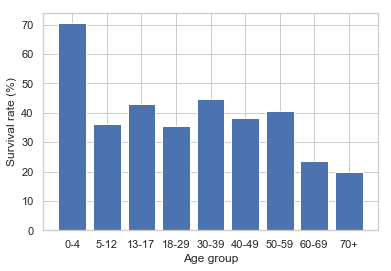

In [581]:
bins = [0,5,12,18,30,40,50,60,70,120]
labels = ['0-4','5-12','13-17','18-29','30-39','40-49','50-59','60-69','70+']
train['agegroup'] = pd.cut(train.Age,bins,labels = labels,include_lowest = True)

#train['agegroup'] 

sv_agegroup = train.groupby('agegroup')['Survived']
num_agegroup = sv_agegroup.count()
sv_num_agegroup = sv_agegroup.sum()
sv_rate_agegroup = sv_agegroup.mean()

xnum = np.arange(len(labels))

plt.figure()
plt.bar(xnum,sv_rate_agegroup*100)

plt.xlabel('Age group')
plt.ylabel('Survival rate (%)')
plt.xticks(xnum,['0-4','5-12','13-17','18-29','30-39','40-49','50-59','60-69','70+'])



Other combined groups (Ages,Gender) & (Ages, Pclass)

(<Figure size 720x288 with 2 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000000267E4668>,
       dtype=object))

<BarContainer object of 9 artists>

<BarContainer object of 8 artists>

Text(0.5, 0, 'Age group')

Text(0, 0.5, 'Number of people')

([<matplotlib.axis.XTick at 0x26a7dcc0>,
 <a list of 9 Text xticklabel objects>)

Text(0.5, 1.0, 'Age distribution of male and female passengers')

<BarContainer object of 9 artists>

<BarContainer object of 8 artists>

Text(0.5, 0, 'Age group')

Text(0, 0.5, 'Survival rate')

([<matplotlib.axis.XTick at 0x26ae44a8>,
 <a list of 9 Text xticklabel objects>)

Text(0.5, 1.0, 'Age distribution of Survival rate')

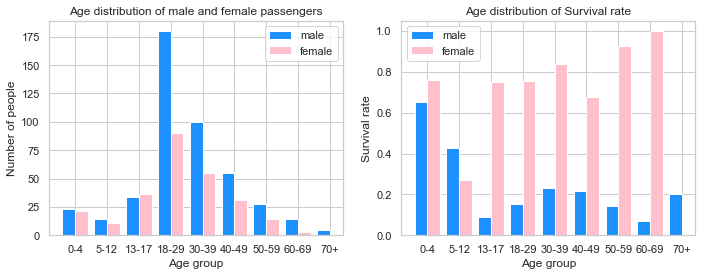

In [614]:
age_sex = train.groupby(['agegroup'])['Sex'].value_counts()

#age_sex[:,'male']
#age_sex[:,'female']

width=0.4
plt.subplots(1,2,sharey = False, tight_layout = True,figsize=(10, 4))

plt.subplot(121)
plt.bar(xnum-width/2,age_sex[:,'male'], width, color = 'dodgerblue')
plt.bar(xnum[0:8]+width/2,age_sex[:,'female'], width, color = 'pink')
plt.xlabel('Age group')
plt.ylabel('Number of people')
plt.xticks(xnum,['0-4','5-12','13-17','18-29','30-39','40-49','50-59','60-69','70+'])
plt.legend(['male','female'])
plt.title('Age distribution of male and female passengers')


plt.subplot(122)
sv_age_sex = train.groupby(['agegroup','Sex'])['Survived']
num_age_sex = sv_age_sex.count()
#num_age_sex

sv_num_age_sex = sv_age_sex.sum()
#sv_num_age_sex

sv_rate_age_sex = sv_age_sex.mean()
#sv_rate_age_sex
plt.bar(xnum-width/2,sv_rate_age_sex[:,'male'], width, color = 'dodgerblue')
plt.bar(xnum[0:8]+width/2,sv_rate_age_sex[:,'female'], width, color = 'pink')
plt.xlabel('Age group')
plt.ylabel('Survival rate')
plt.xticks(xnum,['0-4','5-12','13-17','18-29','30-39','40-49','50-59','60-69','70+'])
plt.legend(['male','female'])
plt.title('Age distribution of Survival rate')

